<a href="https://colab.research.google.com/github/Ahana-14/ML_Project/blob/main/5)sample_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform logistic regression to classify if a patient has a benign tumor or malignant tumor (cancer) based on the features provided. Generate the confusion matrix and evaluate the quality of the model by computing relevant performance metrics including Precision, Recall, accuracy, F1-Score etc. Plot the ROC curve and calculate AUC.
Dataset: samples_cancer.csv


In [ ]:
from google.colab import files
uploaded_cancer=files.upload()

Saving samples_cancer.csv to samples_cancer (1).csv


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("samples_cancer.csv")

In [ ]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
data.isnull().sum()

,0
ID,0
Clump,0
UnifSize,0
UnifShape,0
MargAdh,0
SingEpiSize,0
BareNuc,0
BlandChrom,0
NormNucl,0
Mit,0


In [ ]:
for col in  data.columns :
    print(col, ":" , data[col].nunique())

ID : 645
Clump : 10
UnifSize : 10
UnifShape : 10
MargAdh : 10
SingEpiSize : 10
BareNuc : 11
BlandChrom : 10
NormNucl : 10
Mit : 9
Class : 2


In [ ]:
def func1(x) :
    if x==2 :
        return 0
    else :
        return 1

new_class_labels = list(map(func1, data["Class"]))
data["Class"] = new_class_labels
data.head(15)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [ ]:
# drop rows which conatins null values

data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:

# delete the rows which has specific values

rows_to_drop = data[data["BareNuc"] == "?"].index
data.drop(rows_to_drop, inplace=True)

In [ ]:
# mapping from string to numeric


data["BareNuc"] = list(map(int,data["BareNuc"]))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


numerical_columns = ["Clump" , "UnifSize", "UnifShape", "MargAdh",
                     "SingEpiSize" , "BareNuc", "BlandChrom","NormNucl", "Mit"]



transformer = [
("numeric" , MinMaxScaler(), numerical_columns) ,
]

preprocessor = ColumnTransformer(transformer)

X = preprocessor.fit_transform(data)
y = data["Class"]

In [ ]:
X.shape, y.shape , data.shape

((683, 9), (683,), (683, 11))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((546, 9), (137, 9))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_test_pred = model.predict(X_test)
y_proba_scaled = model.predict_proba(X_test)[:,1]

In [ ]:
0.3,0.7
0.6,0.4

(0.6, 0.4)

In [ ]:
y_test_pred[:10],y_test[:10],y_proba_scaled[:10]

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 352    0
 228    0
 446    0
 105    1
 377    0
 115    0
 125    0
 667    0
 291    0
 518    0
 Name: Class, dtype: int64,
 array([0.49476891, 0.0109238 , 0.0080207 , 0.5727938 , 0.00884381,
        0.02447305, 0.00990903, 0.02160121, 0.01223646, 0.02061128]))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc , roc_auc_score

In [ ]:
acc = accuracy_score(y_test_pred, y_test)
p = precision_score(y_test_pred, y_test)
r = recall_score(y_test_pred, y_test)
f1 = f1_score(y_test_pred, y_test)
auc = roc_auc_score( y_test, y_proba_scaled)



print("Test Data ")
print("accuracy : " , acc, "precision : ", p, "recall : ", r , "f1 score : " , f1, "auc : ", auc)

Test Data 
accuracy :  0.9854014598540146 precision :  0.975609756097561 recall :  0.975609756097561 f1 score :  0.975609756097561 auc :  0.9984756097560975


In [ ]:
cm = confusion_matrix(y_test_pred,y_test)
tn, fp , fn, tp = confusion_matrix(y_test_pred,y_test).ravel()
print("confusion matrix : " , cm)
print("tn, fp , fn, tp : " , tn, fp , fn, tp)

confusion matrix :  [[95  1]
 [ 1 40]]
tn, fp , fn, tp :  95 1 1 40


ValueError: x and y must have same first dimension, but have shapes (33,) and (1,)

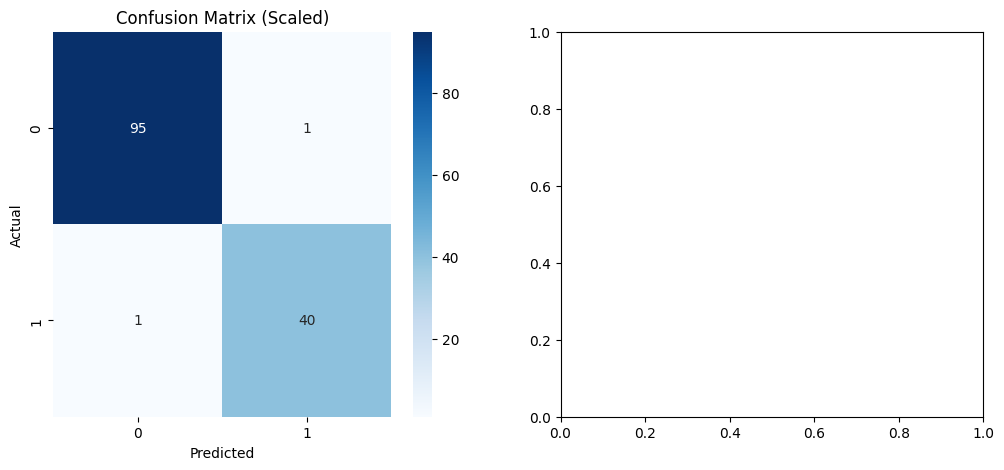

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plot ROC and Confusion Matrix
fpr, tpr, _ = roc_curve(y_test, y_proba_scaled)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Confusion Matrix (Scaled)')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

axs[1].plot(fpr, 0, label=f"AUC = {auc:.2f}")
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")
axs[1].set_title("ROC Curve (Scaled)")
axs[1].legend()

plt.tight_layout()